<a href="https://colab.research.google.com/github/SaikatGhosh94/MachineLearningCourse/blob/main/Hands_on_practice/Clustering/04_DBSCAN_practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

##DBSCAN VS KMeans Clustering

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
blobs = pd.read_csv('cluster_blobs.csv')

In [3]:
blobs.head()

,X1,X2
0,4.645333,6.822294
1,4.784032,6.422883
2,-5.851786,5.774331
3,-7.459592,6.456415
4,4.918911,6.961479


<Axes: xlabel='X1', ylabel='X2'>

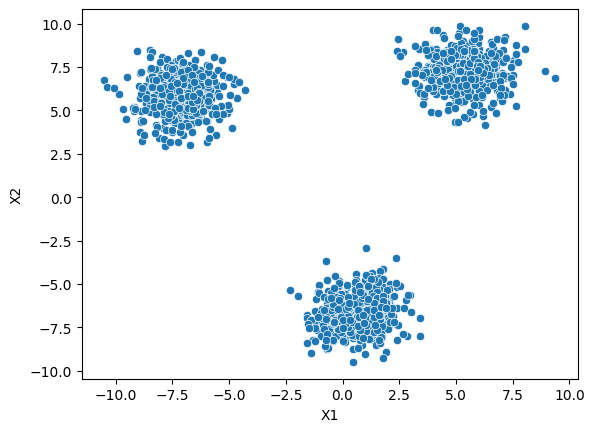

In [4]:
sns.scatterplot(data=blobs,x='X1',y='X2')

In [5]:
moons = pd.read_csv('cluster_moons.csv')
moons.head()

,X1,X2
0,0.674362,-0.444625
1,1.547129,-0.239796
2,1.601930,-0.230792
3,0.014563,0.449752
4,1.503476,-0.389164


<Axes: xlabel='X1', ylabel='X2'>

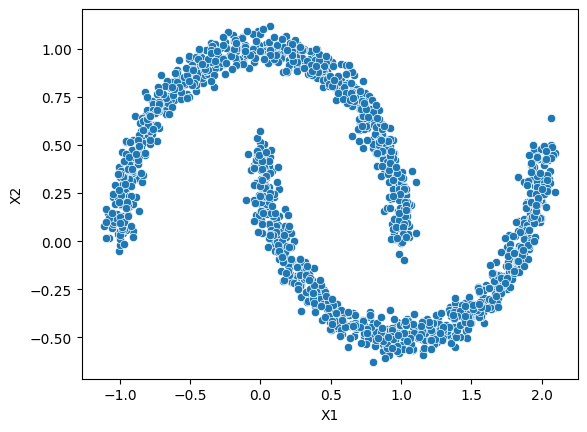

In [6]:
sns.scatterplot(data=moons,x='X1',y='X2')

In [7]:
circles = pd.read_csv('cluster_circles.csv')
circles.head()

,X1,X2
0,-0.348677,0.010157
1,-0.176587,-0.954283
2,0.301703,-0.113045
3,-0.782889,-0.719468
4,-0.733280,-0.757354


<Axes: xlabel='X1', ylabel='X2'>

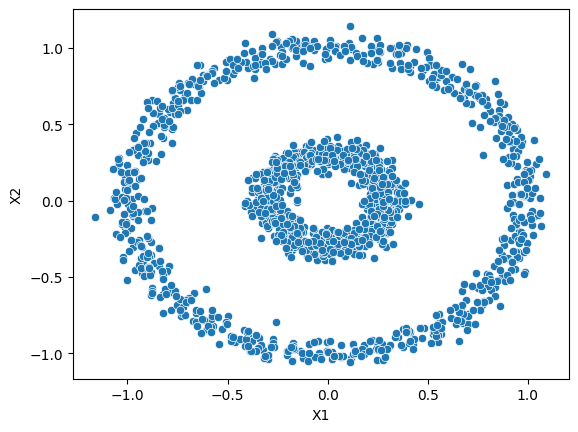

In [8]:
sns.scatterplot(data=circles,x='X1',y='X2')

In [35]:
def display_categories(model,data):
  labels = model.fit_predict(data)
  sns.scatterplot(data=data,x='X1',y='X2',hue=labels,palette='Set1')

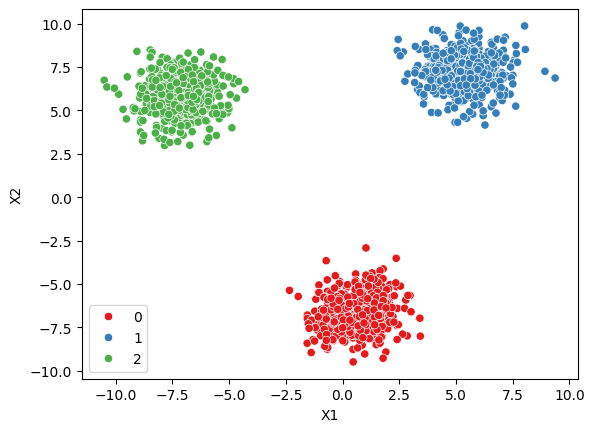

In [36]:
from sklearn.cluster import KMeans
display_categories(KMeans(n_clusters=3),blobs)

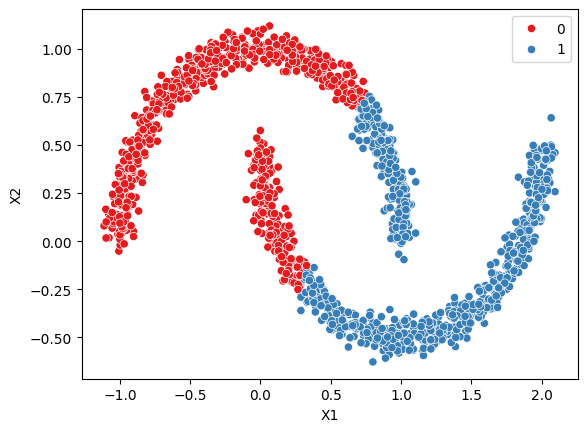

In [37]:
display_categories(KMeans(n_clusters=2),moons)

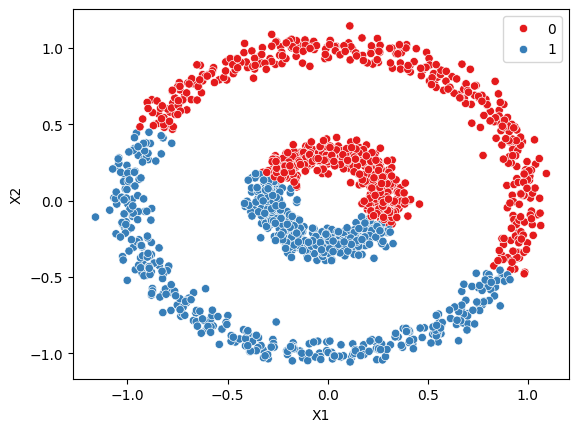

In [38]:
display_categories(KMeans(n_clusters=2),circles)

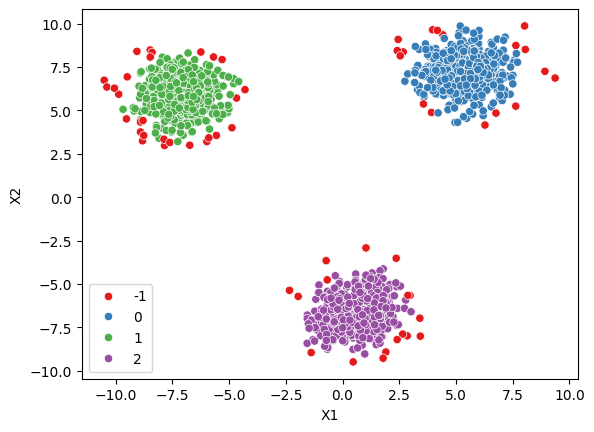

In [39]:
from sklearn.cluster import DBSCAN
display_categories(DBSCAN(),blobs)

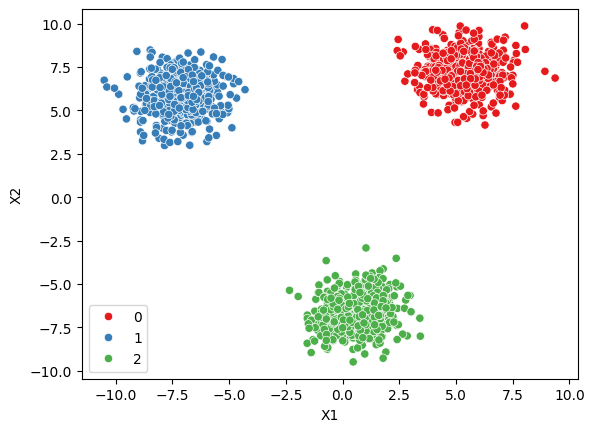

In [40]:
display_categories(DBSCAN(eps=1.5),blobs)

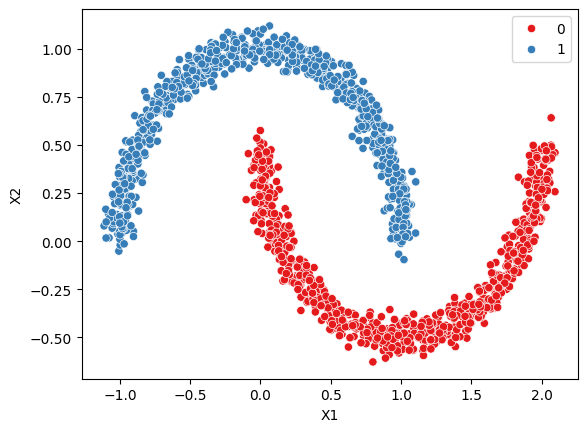

In [41]:
display_categories(DBSCAN(eps=0.15),moons)

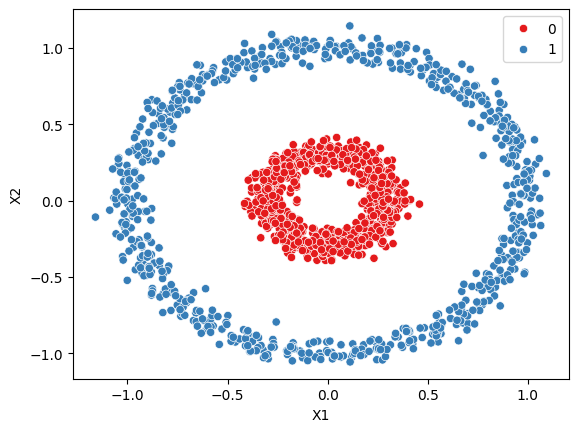

In [42]:
display_categories(DBSCAN(eps=0.15),circles)

##Adjusting DBSCAN hyperparameters

In [28]:
two_blobs = pd.read_csv('cluster_two_blobs.csv')
two_blobs_outlier = pd.read_csv('cluster_two_blobs_outliers.csv')

In [29]:
two_blobs.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

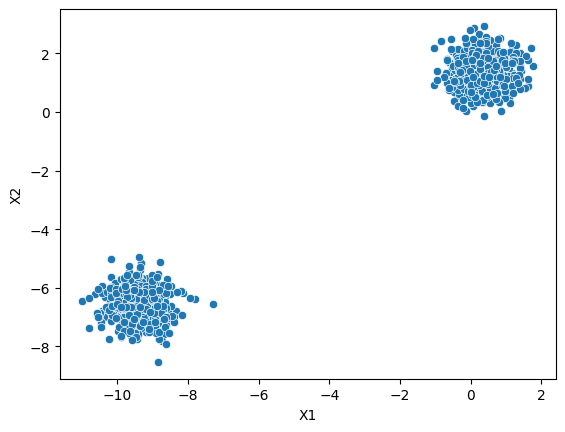

In [30]:
sns.scatterplot(data=two_blobs,x='X1',y='X2')

In [31]:
two_blobs_outlier.head()

,X1,X2
0,0.046733,1.765120
1,-8.994134,-6.508186
2,0.650539,1.264533
3,-9.501554,-6.736493
4,0.057050,0.188215


<Axes: xlabel='X1', ylabel='X2'>

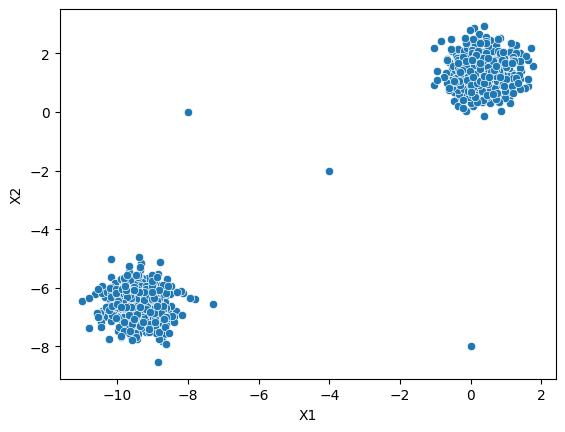

In [32]:
sns.scatterplot(data=two_blobs_outlier,x='X1',y='X2')

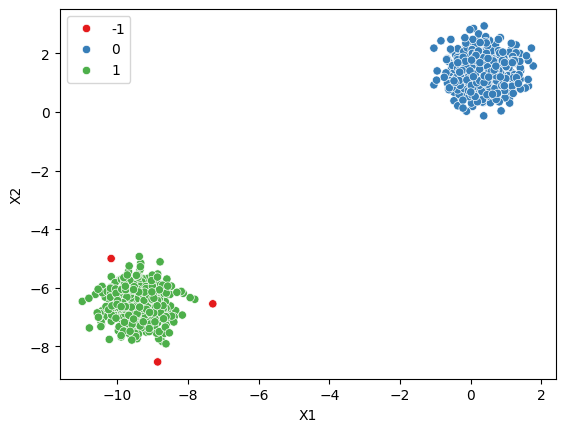

In [43]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN()
display_categories(dbscan,two_blobs)

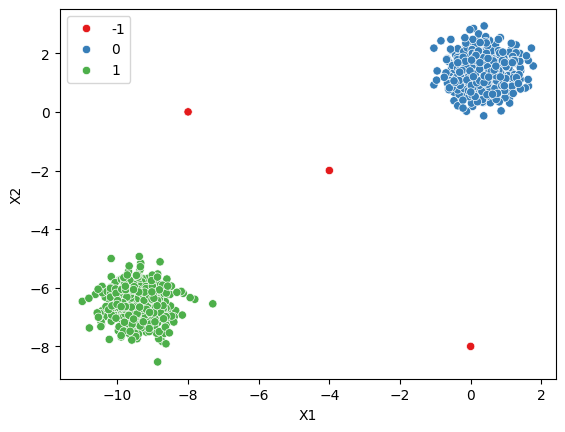

In [50]:
display_categories(dbscan,two_blobs_outlier)

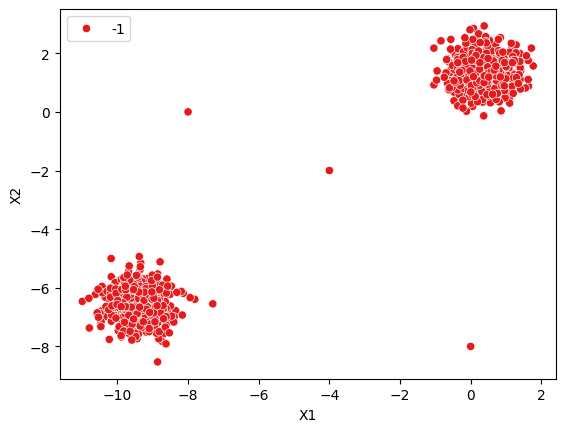

In [51]:
dbscan = DBSCAN(eps=0.001)
display_categories(dbscan,two_blobs_outlier)

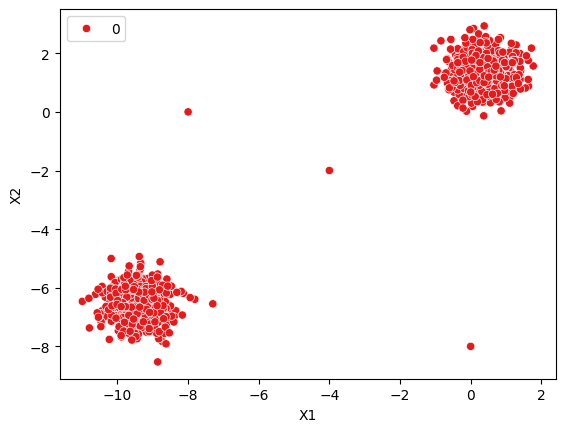

In [52]:
dbscan = DBSCAN(eps=10)
display_categories(dbscan,two_blobs_outlier)

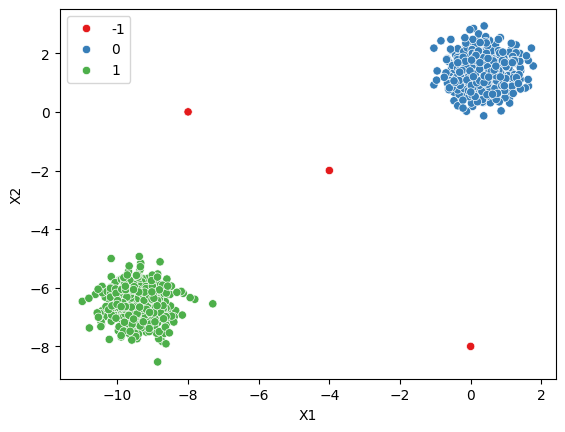

In [53]:
dbscan = DBSCAN(eps=1)
display_categories(dbscan,two_blobs_outlier)

In [55]:
#number of outliers
np.sum(dbscan.labels_ == -1)

np.int64(3)

In [56]:
#number of clusters and outliers
len(np.unique(dbscan.labels_))

3

In [57]:
#percentage of outliers
100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)

np.float64(0.29910269192422734)

In [59]:
outlier_percent = []
no_of_outliers = []

for eps in np.linspace(0.001,7,200):
  dbscan = DBSCAN(eps = eps)
  dbscan.fit(two_blobs_outlier)

  no_of_outliers.append(np.sum(dbscan.labels_ == -1))
  perc_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

(0.0, 10.0)

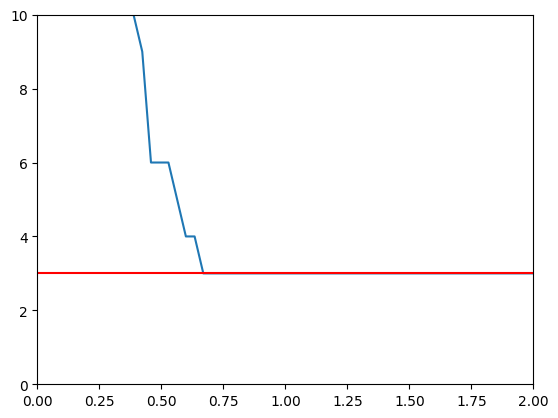

In [67]:
sns.lineplot(x=np.linspace(0.001,7,200),y= no_of_outliers)
plt.xlim(0,2)
plt.hlines(y=3,xmin=0,xmax=2,color='red')
plt.ylim(0,10)

Text(0, 0.5, 'Percent of point classified as outlier')

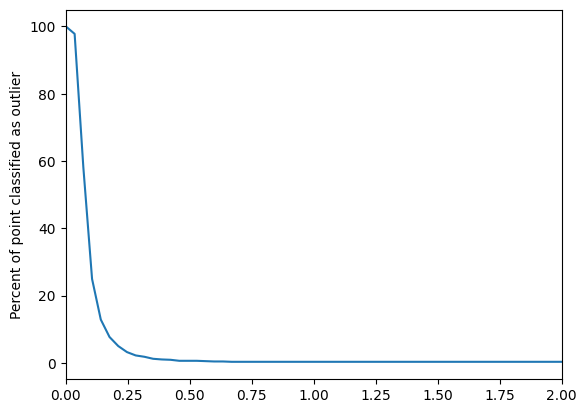

In [63]:
sns.lineplot(x=np.linspace(0.001,7,200),y= outlier_percent)
plt.xlim(0,2)
plt.ylabel("Percent of point classified as outlier")

In [69]:
outlier_percent = []
no_of_outliers = []

for no_of_samples in np.arange(1,100):
  dbscan = DBSCAN(min_samples=no_of_samples)
  dbscan.fit(two_blobs_outlier)

  no_of_outliers.append(np.sum(dbscan.labels_ == -1))
  perc_outlier = 100 * np.sum(dbscan.labels_ == -1) / len(dbscan.labels_)
  outlier_percent.append(perc_outlier)

Text(0, 0.5, 'Percent of point classified as outlier')

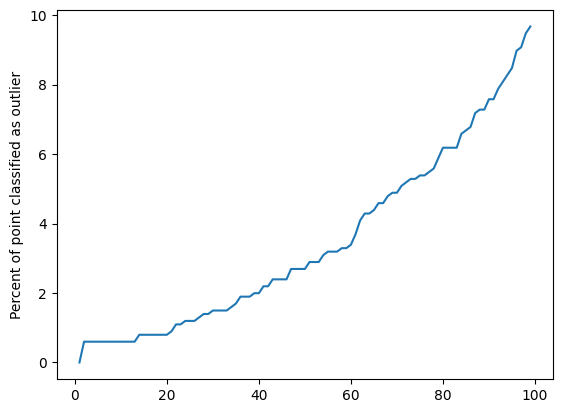

In [72]:
sns.lineplot(x=np.arange(1,100),y= outlier_percent)
plt.ylabel("Percent of point classified as outlier")

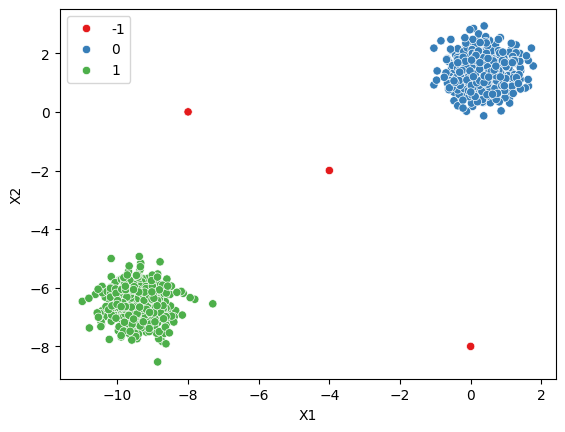

In [73]:
num_dim =two_blobs_outlier.shape[1]
dbscan = DBSCAN(min_samples = 2* num_dim,eps=0.75)
display_catergories(dbscan,two_blobs_outlier)